
# Data and computations for paper 

Lars G. Johnsen
National Library of Norway

In [112]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations')
from collocations import dist_coll_urn
import pandas as pd

Updated file `D:\Documents\GitHub\newspapers_coll_conc\collocations.py`

In [113]:
def df_jaccard(df, col1, col2, number=100, asc=False):
    s1 = df.sort_values(by=col1, ascending=asc)[:number].index
    s2 = df.sort_values(by=col2, ascending=asc)[:number].index
    
    #print(len(set(s1)&set(s2)))
    
    return jaccard(s1, s2)

In [114]:
def jaccard(s1, s2):
    return len(set(s1)&set(s2))/len(set(s1)|set(s2))

In [165]:
def make_coll_df(small, large, tot):
    """take two collocations, small and large, and a reference tot. The reference must av a column call tot as well"""
    coll = pd.DataFrame()
    coll['small'] = small['freq']
    coll['large'] = large['freq']
    coll['ratio'] = coll['small']/coll['large']
    coll['srel'] = coll.small/coll.small.sum()
    coll['lrel'] = coll.large/coll.large.sum()
    coll['ratio_rel'] = coll.srel**0.2*coll.srel/coll.lrel
    coll['nb'] = coll.small/tot.tot
    coll['combo'] = small.ascore*large.ascore
    coll['mass_dist'] = coll.combo * coll.ratio_rel
    return coll

### Reference corpus

The reference is the total counts from approximately 450 000 books from nb.no

In [116]:
tot = nb.frame(nb.totals(50000), 'tot')

In [117]:
nb.normalize_corpus_dataframe(tot)
tot.head()

,tot
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


# Corpus

The corpus for doing collocations is a sample of 800 books from fictional literature, dewey decimal code 813.

In [118]:
corpus = nb.book_corpus(ddk="813%", period=(1980, 2000), limit = 500)

In [119]:
corpus

,urn,author,title,year
0,2011011308062,"Lee, Miranda",Forførelse &amp; forsakelse,1996
1,2010051012002,"Stine, R.L.",Ånden i brusen,1999
2,2007082301024,"Morrell, David",Under to måner,1991
3,2012083008009,"Helm, Eric",Overmakten,1994
4,2015063008035,"Boswell, Barbara",Mann søker kvinne,1996
...,...,...,...,...
495,2008081304013,"Ludlum, Robert",Kodenavn: Sting,1997
496,2010090608128,"Hutchinson, Bobby",Der kjærlighet fødes-,1998
497,2008022900054,"Hoh, Diane",Eksperimentet,1995
498,2008020504089,"Tan, Amy",Kjøkkengudens kone,1994


Set up the distance parameters and collword, smd is small distance while lmd is large distance. These values are half of the actual window, and used to make a normalized score, call ascore. See below.

In [120]:
smd = 2.5
lmd = 5
collword = 'kaffe'

In [121]:
a1 = dist_coll_urn(collword, urns=list(corpus.urn), after= int(2*smd), before = 0)
a2 = dist_coll_urn(collword, urns=list(corpus.urn), after= int(2*lmd), before = 0)

In [122]:
b1 = dist_coll_urn(collword, urns=list(corpus.urn), after=0, before = int(2*smd))
b2 = dist_coll_urn(collword, urns=list(corpus.urn), after=0, before = int(2*lmd))

## Normalized distance score

In [123]:
a1['ascore'] = smd/a1.score
a2['ascore'] = lmd/a2.score

In [124]:
b1['ascore'] = smd/b1.score
b2['ascore'] = lmd/b2.score

## Create collocation dataframe 

Based on data from a1 and a2, and b1 and b2. The name for the collocations after is `coll` while `collb` is for the collocates coming before.

In [166]:
coll = make_coll_df(a1, a2, tot)
collb = make_coll_df(b1, b2, tot)

In [167]:
coll.sort_values(by='mass_dist', ascending=False)[:20]

,small,large,ratio,srel,lrel,ratio_rel,nb,combo,mass_dist
eller,74.0,92.0,0.804348,0.004069,0.002754,0.491486,2.695357e+04,2.508529,1.232906
og,1132.0,1633.0,0.693203,0.062249,0.048878,0.730887,4.474754e+04,1.432730,1.047164
?,421.0,653.0,0.644717,0.023151,0.019545,0.557758,5.955337e+04,1.761059,0.982245
",",1101.0,1830.0,0.601639,0.060544,0.054774,0.630833,2.139803e+04,1.221502,0.770564
til,413.0,669.0,0.617339,0.022711,0.020024,0.532028,3.486021e+04,1.424989,0.758134
.,1778.0,3009.0,0.590894,0.097773,0.090063,0.681893,3.017596e+04,1.105979,0.754160
mens,82.0,117.0,0.700855,0.004509,0.003502,0.437131,1.839534e+05,1.382743,0.604440
f,6.0,8.0,0.750000,0.000330,0.000239,0.277276,4.619701e+03,2.113271,0.585959
Svart,5.0,5.0,1.000000,0.000275,0.000150,0.356463,1.344638e+06,1.642489,0.585487
sigaretter,4.0,4.0,1.000000,0.000220,0.000120,0.340904,8.518218e+05,1.674167,0.570731


In [172]:
collb.sort_values(by='ratio_rel', ascending=False)[:20]

,small,large,ratio,srel,lrel,ratio_rel,nb,combo,mass_dist
kopp,917.0,935.0,0.980749,0.050426,0.028461,0.974849,6.544219e+07,7.137147,6.957642
en,1107.0,1346.0,0.822437,0.060874,0.040972,0.848864,1.026639e+05,1.475797,1.252750
drakk,323.0,344.0,0.938953,0.017762,0.010471,0.757514,1.161397e+07,3.891899,2.948166
skjenket,254.0,269.0,0.944238,0.013968,0.008188,0.726029,2.967920e+07,1.638356,1.189494
litt,184.0,214.0,0.859813,0.010118,0.006514,0.619831,3.790545e+05,3.609379,2.237206
mer,133.0,145.0,0.917241,0.007314,0.004414,0.619669,1.578687e+05,6.530825,4.046951
og,913.0,1467.0,0.622359,0.050206,0.044655,0.618074,3.609055e+04,0.820264,0.506984
drikke,103.0,108.0,0.953704,0.005664,0.003287,0.612191,2.648283e+06,4.744913,2.904792
svart,94.0,97.0,0.969072,0.005169,0.002953,0.610784,1.524285e+06,8.607630,5.257401
med,531.0,777.0,0.683398,0.029200,0.023652,0.608973,6.252777e+04,1.211099,0.737527


## Sorting 

Sorting on the reference is by column 'nb'

In [168]:
coll.sort_values(by='nb', ascending=False)[:20][:20].fillna(0).style.background_gradient()

,small,large,ratio,srel,lrel,ratio_rel,nb,combo,mass_dist
rundstykker,15,18,0.833333,0.000824856,0.000538761,0.370048,1.44121e+07,1.37756,0.509764
kannen,9,15,0.6,0.000494913,0.000448967,0.240558,8.78516e+06,0.833333,0.200465
smørbrød,22,30,0.733333,0.00120979,0.000897935,0.351566,6.76607e+06,1.18977,0.418284
koppene,8,9,0.888889,0.000439923,0.00026938,0.348086,5.98563e+06,1.53548,0.534477
koppen,21,44,0.477273,0.0011548,0.00131697,0.226689,4.17286e+06,0.804904,0.182463
konjakk,11,14,0.785714,0.000604894,0.000419036,0.327917,3.29441e+06,1.0749,0.352477
filteret,4,4,1,0.000219962,0.000119725,0.340904,3.06804e+06,1.468,0.500447
Randy,3,4,0.75,0.000164971,0.000119725,0.241383,2.97132e+06,1.14133,0.275498
Dillon,4,6,0.666667,0.000219962,0.000179587,0.22727,2.94068e+06,0.701754,0.159487
bacon,8,12,0.666667,0.000439923,0.000359174,0.261064,2.92243e+06,1.20983,0.315844


In [169]:
coll.sort_values(by='mass_dist', ascending=False)[:20].fillna(0).style.background_gradient()

,small,large,ratio,srel,lrel,ratio_rel,nb,combo,mass_dist
eller,74,92,0.804348,0.00406929,0.00275367,0.491486,26953.6,2.50853,1.23291
og,1132,1633,0.693203,0.0622491,0.0488776,0.730887,44747.5,1.43273,1.04716
?,421,653,0.644717,0.0231509,0.019545,0.557758,59553.4,1.76106,0.982245
",",1101,1830,0.601639,0.0605444,0.054774,0.630833,21398,1.2215,0.770564
til,413,669,0.617339,0.022711,0.0200239,0.532028,34860.2,1.42499,0.758134
.,1778,3009,0.590894,0.0977729,0.0900629,0.681893,30176,1.10598,0.75416
mens,82,117,0.700855,0.00450921,0.00350195,0.437131,183953,1.38274,0.60444
f,6,8,0.75,0.000329942,0.000239449,0.277276,4619.7,2.11327,0.585959
Svart,5,5,1,0.000274952,0.000149656,0.356463,1.34464e+06,1.64249,0.585487
sigaretter,4,4,1,0.000219962,0.000119725,0.340904,851822,1.67417,0.570731


# collb

In [170]:
collb.sort_values(by='mass_dist', ascending=False)[['nb', 'mass_dist']][:40].fillna(0).style.background_gradient()

,nb,mass_dist
kopp,6.54422e+07,6.95764
svart,1.52428e+06,5.2574
mer,157869,4.04695
nytrukket,0,3.85666
slurk,7.87249e+06,3.09295
varm,2.55242e+06,3.00943
drakk,1.1614e+07,2.94817
drikke,2.64828e+06,2.90479
koffeinfri,0,2.89246
nytraktet,0,2.69783


In [171]:
collb.sort_values(by='nb', ascending=False)[['nb', 'mass_dist']][:40].fillna(0).style.background_gradient()

,nb,mass_dist
kopp,6.54422e+07,6.95764
kanne,3.15124e+07,2.50909
skjenket,2.96792e+07,1.18949
rykende,1.54772e+07,1.41244
krus,1.37503e+07,0.805939
drakk,1.1614e+07,2.94817
skjenke,1.03079e+07,0.91151
kopper,8.79951e+06,1.71967
dampende,8.39784e+06,1.43658
slurk,7.87249e+06,3.09295


# coll

In [173]:
coll.sort_values(by='combo', ascending=False)[['nb', 'mass_dist','combo']][:10].fillna(0).style.background_gradient()

,nb,mass_dist,combo
eller,26953.6,1.23291,2.50853
blandet,323978,0.513178,2.11506
f,4619.7,0.585959,2.11327
imens,595654,0.57072,1.92308
?,59553.4,0.982245,1.76106
hang,65323.2,0.544678,1.69237
uansett,66005.5,0.544678,1.69237
50,12134.7,0.544678,1.69237
sigaretter,851822,0.570731,1.67417
Svart,1.34464e+06,0.585487,1.64249


In [133]:
coll.sort_values(by='nb', ascending=False)[['nb', 'mass_dist','combo']][:10].fillna(0).style.background_gradient()

,nb,mass_dist,combo
rundstykker,1.44121e+07,0.509764,1.37756
kannen,8.78516e+06,0.200465,0.833333
smørbrød,6.76607e+06,0.418284,1.18977
koppene,5.98563e+06,0.534477,1.53548
koppen,4.17286e+06,0.182463,0.804904
konjakk,3.29441e+06,0.352477,1.0749
filteret,3.06804e+06,0.500447,1.468
Randy,2.97132e+06,0.275498,1.14133
Dillon,2.94068e+06,0.159487,0.701754
bacon,2.92243e+06,0.315844,1.20983


# jaccard similarity

# for collb

In [184]:
jaccard_scoresb = nb.frame({'mass_dist': {x:df_jaccard(collb, 'nb', 'mass_dist', x) for x in range(5, 210, 5)},
                            'dist_combo': {x:df_jaccard(collb, 'nb', 'combo', x) for x in range(5, 210, 5)},
                           'mass_ratio': {x:df_jaccard(collb, 'nb', 'ratio_rel', x) for x in range(5, 210, 5)}
                          }).transpose()

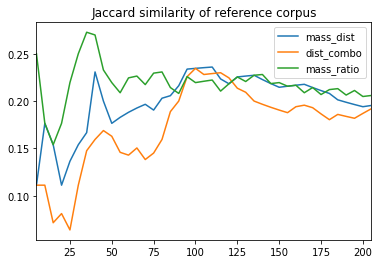

In [188]:
jaccard_scoresb.plot(title='Jaccard similarity of reference corpus');

# for coll

In [186]:
jaccard_scores = nb.frame({'mass_dist': {x:df_jaccard(coll, 'nb', 'mass_dist', x) for x in range(5, 210, 5)},
                            'dist_combo': {x:df_jaccard(coll, 'nb', 'combo', x) for x in range(5, 210, 5)},
                           'mass_ratio': {x:df_jaccard(coll, 'nb', 'ratio_rel', x) for x in range(5, 210, 5)}
                          }).transpose()

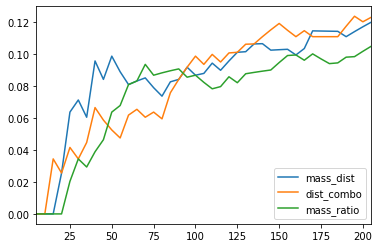

In [187]:
jaccard_scores.plot();